In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def initialize_centroids(X, K):
    np.random.seed(42) # For reproducibility
    random_indices = np.random.permutation(X.shape[0])
    centroids = X[random_indices[:K]]
    return centroids

In [3]:
def assign_clusters(X, centroids):
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    clusters = np.argmin(distances, axis=0)
    return clusters

In [4]:
def update_centroids(X, clusters, K):
    new_centroids = np.array([X[clusters == k].mean(axis=0) for k in range(K)])
    return new_centroids


In [5]:
def k_means(X, K, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(X, K)
    for i in range(max_iters):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, K)
        if np.all(np.abs(new_centroids - centroids) < tol):
            centroids = new_centroids
            break
    return centroids, clusters

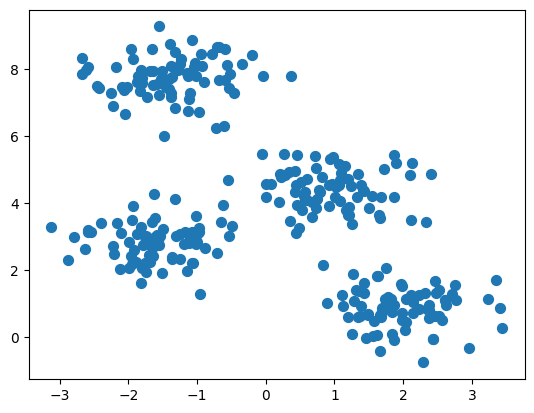

In [6]:
from sklearn.datasets import make_blobs

# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.show()

In [7]:
# Define value of k

K = 4

centroids, clusters = k_means(X, K)

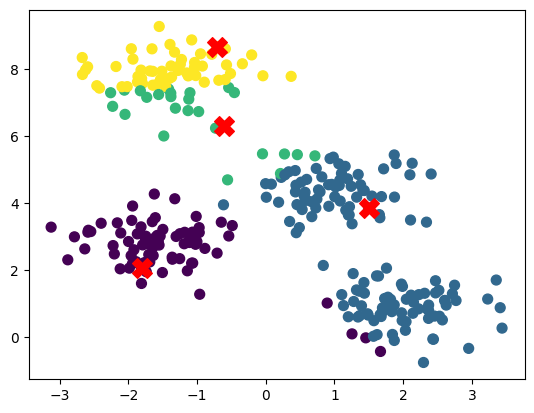

In [8]:

# Plot the results
plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X')
plt.show()

In [9]:
!wget "https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W" -O E-commerce.csv

--2026-01-04 12:18:32--  https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W
Resolving drive.google.com (drive.google.com)... 142.250.195.78, 2404:6800:4009:80f::200e
Connecting to drive.google.com (drive.google.com)|142.250.195.78|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W&export=download [following]
--2026-01-04 12:18:32--  https://drive.usercontent.google.com/download?id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.250.205.193, 2404:6800:4009:81e::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.250.205.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139827 (137K) [application/octet-stream]
Saving to: ‘E-commerce.csv’

E-commerce.csv      100%[===================>] 136.55K  --.-KB/s    in 0

In [10]:
import pandas as pd

In [11]:
df = pd.read_csv('E-commerce.csv')

In [70]:
df.head(5)

,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,1476,130,65,213.905831,31.600751,233,235
1,1535,543,46,639.223004,5.689175,228,170
2,1807,520,102,1157.402763,844.321606,247,409
3,1727,702,83,1195.903634,850.041757,148,200
4,1324,221,84,180.754616,64.283300,243,259


In [12]:
print(df.shape)

(2500, 7)


In [13]:
X = df.drop("ID",axis=1)

In [14]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
X_scaled = Scaler.fit_transform(X)

In [15]:
X_scaled

array([[-1.49525046, -0.75853514, -1.05461141, -0.73280039,  0.32311781,
         0.33919174],
       [ 0.72069055, -1.24748762, -0.69029218, -0.78600183,  0.27267227,
        -0.31003449],
       [ 0.59728463,  0.19363547, -0.24642848,  0.93587151,  0.46436533,
         2.07712043],
       ...,
       [-0.18070918,  0.42524454, -1.2378394 , -0.7976828 , -1.18015931,
         2.52658475],
       [-0.73871854, -1.60776839,  1.49508613, -0.63726061, -0.90775339,
         0.13942982],
       [ 2.17473416,  0.73405663, -0.04325887,  1.38982053,  0.47445444,
        -0.51978451]], shape=(2500, 6))

In [16]:
from sklearn.cluster import KMeans
kmeans_iter1 = KMeans(n_clusters=3,init="random",algorithm="lloyd")
kmeans_iter2 = KMeans(n_clusters=6,init="random",algorithm="lloyd")
kmeans_iter3 = KMeans(n_clusters=4,init="random",algorithm="lloyd")
kmeans_iter4 = KMeans(n_clusters=5,init="random",algorithm="lloyd")

In [17]:
kmeans_iter1.fit(X_scaled)
kmeans_iter2.fit(X_scaled)
kmeans_iter3.fit(X_scaled)

,n_clusters,4
,init,'random'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [18]:
from sklearn.decomposition import PCA

pca = PCA(2)

components_pca = pca.fit_transform(X_scaled)

In [19]:
def viz_clusters(clusters):
    plt.scatter(clusters['X1'], clusters['X2'], c=clusters['label'], s = 40)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Visualizing Clusters')

In [20]:
clusters_1 = pd.DataFrame(components_pca, columns=['X1', 'X2'])
clusters_1['label'] = kmeans_iter1.labels_


clusters_2 = pd.DataFrame(components_pca, columns=['X1', 'X2'])
clusters_2['label'] = kmeans_iter2.labels_


clusters_3 = pd.DataFrame(components_pca, columns=['X1', 'X2'])
clusters_3['label'] = kmeans_iter3.labels_

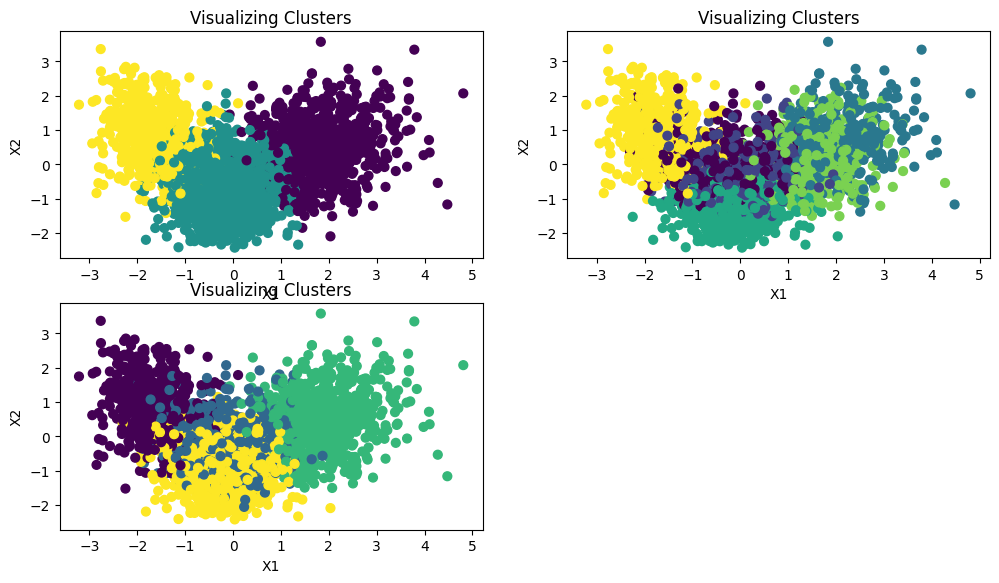

In [21]:
plt.figure(figsize=(12,10))

plt.subplot(321)
viz_clusters(clusters_1)

plt.subplot(322)
viz_clusters(clusters_2)

plt.subplot(323)
viz_clusters(clusters_3)